In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.utils.extmath import softmax

# Part 1

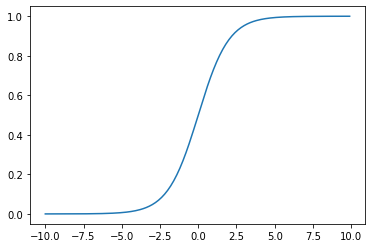

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-10, 10, 0.1)
y = sigmoid(x)
plt.plot(x, y)

In [3]:
data = datasets.load_iris()
df = pd.DataFrame(data["data"], columns=data["feature_names"]).drop(columns=["petal length (cm)"])
df.insert(2, "const", 1)
df["variety"] = data["target_names"][data["target"]]
df.insert(4, "setosa", df["variety"] == "setosa")

In [4]:
xcols = ["sepal length (cm)", "sepal width (cm)", "const"]
train, test = train_test_split(df, test_size=10, random_state=5)
test = test.copy()
test

,sepal length (cm),sepal width (cm),const,petal width (cm),setosa,variety
82,5.8,2.7,1,1.2,False,versicolor
134,6.1,2.6,1,1.4,False,virginica
114,5.8,2.8,1,2.4,False,virginica
42,4.4,3.2,1,0.2,True,setosa
109,7.2,3.6,1,2.5,False,virginica
57,4.9,2.4,1,1.0,False,versicolor
1,4.9,3.0,1,0.2,True,setosa
70,5.9,3.2,1,1.8,False,versicolor
25,5.0,3.0,1,0.2,True,setosa
84,5.4,3.0,1,1.5,False,versicolor


## Overview

1. regression for petal width
2. binary classification for setosa: T/F
3. binary classification for setosa: prob(T)
4. multi-class classification for variety

In [5]:
reg = LinearRegression(fit_intercept=False)
reg.fit(train[xcols], train["petal width (cm)"])
test["prediction"] = reg.predict(test[xcols])
test

,sepal length (cm),sepal width (cm),const,petal width (cm),setosa,variety,prediction
82,5.8,2.7,1,1.2,False,versicolor,1.327769
134,6.1,2.6,1,1.4,False,virginica,1.590835
114,5.8,2.8,1,2.4,False,virginica,1.279061
42,4.4,3.2,1,0.2,True,setosa,0.083889
109,7.2,3.6,1,2.5,False,virginica,1.889735
57,4.9,2.4,1,1.0,False,versicolor,0.830818
1,4.9,3.0,1,0.2,True,setosa,0.538569
70,5.9,3.2,1,1.8,False,versicolor,1.155681
25,5.0,3.0,1,0.2,True,setosa,0.610022
84,5.4,3.0,1,1.5,False,versicolor,0.895833


In [6]:
cls = LogisticRegression(fit_intercept=False) # it is a classifier, despite the name!
cls.fit(train[xcols], train["setosa"])
test["prediction"] = cls.predict(test[xcols])
test

,sepal length (cm),sepal width (cm),const,petal width (cm),setosa,variety,prediction
82,5.8,2.7,1,1.2,False,versicolor,False
134,6.1,2.6,1,1.4,False,virginica,False
114,5.8,2.8,1,2.4,False,virginica,False
42,4.4,3.2,1,0.2,True,setosa,True
109,7.2,3.6,1,2.5,False,virginica,False
57,4.9,2.4,1,1.0,False,versicolor,False
1,4.9,3.0,1,0.2,True,setosa,True
70,5.9,3.2,1,1.8,False,versicolor,False
25,5.0,3.0,1,0.2,True,setosa,True
84,5.4,3.0,1,1.5,False,versicolor,False


In [7]:
test["prob"] = cls.predict_proba(test[xcols])[:, 1]
test

,sepal length (cm),sepal width (cm),const,petal width (cm),setosa,variety,prediction,prob
82,5.8,2.7,1,1.2,False,versicolor,False,0.059437
134,6.1,2.6,1,1.4,False,virginica,False,0.020275
114,5.8,2.8,1,2.4,False,virginica,False,0.085368
42,4.4,3.2,1,0.2,True,setosa,True,0.929430
109,7.2,3.6,1,2.5,False,virginica,False,0.066543
57,4.9,2.4,1,1.0,False,versicolor,False,0.147721
1,4.9,3.0,1,0.2,True,setosa,True,0.642773
70,5.9,3.2,1,1.8,False,versicolor,False,0.258524
25,5.0,3.0,1,0.2,True,setosa,True,0.585481
84,5.4,3.0,1,1.5,False,versicolor,False,0.349072


In [8]:
multi = LogisticRegression(fit_intercept=False) # it is a classifier, despite the name!
multi.fit(train[xcols], train["variety"])
test["prediction"] = multi.predict(test[xcols])
test

,sepal length (cm),sepal width (cm),const,petal width (cm),setosa,variety,prediction,prob
82,5.8,2.7,1,1.2,False,versicolor,versicolor,0.059437
134,6.1,2.6,1,1.4,False,virginica,virginica,0.020275
114,5.8,2.8,1,2.4,False,virginica,versicolor,0.085368
42,4.4,3.2,1,0.2,True,setosa,setosa,0.929430
109,7.2,3.6,1,2.5,False,virginica,virginica,0.066543
57,4.9,2.4,1,1.0,False,versicolor,versicolor,0.147721
1,4.9,3.0,1,0.2,True,setosa,setosa,0.642773
70,5.9,3.2,1,1.8,False,versicolor,versicolor,0.258524
25,5.0,3.0,1,0.2,True,setosa,setosa,0.585481
84,5.4,3.0,1,1.5,False,versicolor,versicolor,0.349072


In [9]:
X = test[xcols].values
X

array([[5.8, 2.7, 1. ],
       [6.1, 2.6, 1. ],
       [5.8, 2.8, 1. ],
       [4.4, 3.2, 1. ],
       [7.2, 3.6, 1. ],
       [4.9, 2.4, 1. ],
       [4.9, 3. , 1. ],
       [5.9, 3.2, 1. ],
       [5. , 3. , 1. ],
       [5.4, 3. , 1. ]])

In [10]:
reg.coef_.reshape(-1,1)

array([[ 0.71452794],
       [-0.48708032],
       [-1.5013766 ]])

In [11]:
def reg_predict(X):
    return X @ reg.coef_.reshape(-1,1)

reg_predict(X)

array([[1.32776857],
       [1.59083498],
       [1.27906054],
       [0.0838893 ],
       [1.8897354 ],
       [0.83081752],
       [0.53856933],
       [1.15568121],
       [0.61002213],
       [0.8958333 ]])

In [12]:
cls.predict(X)

array([False, False, False,  True, False, False,  True, False,  True,
       False])

In [13]:
cls.coef_.reshape(-1,1)

array([[-2.42108094],
       [ 3.90002306],
       [ 0.75064911]])

In [14]:
def cls_predict(X):
    return X @ cls.coef_.reshape(-1,1) > 0

cls_predict(X).reshape(-1)

array([False, False, False,  True, False, False,  True, False,  True,
       False])

In [15]:
cls.predict_proba(X)

array([[0.9405628 , 0.0594372 ],
       [0.97972503, 0.02027497],
       [0.91463241, 0.08536759],
       [0.07056997, 0.92943003],
       [0.93345725, 0.06654275],
       [0.85227945, 0.14772055],
       [0.35722665, 0.64277335],
       [0.74147607, 0.25852393],
       [0.41451931, 0.58548069],
       [0.65092753, 0.34907247]])

In [16]:
def cls_predict_proba(X):
    return sigmoid(X @ cls.coef_.reshape(-1,1))

cls_predict_proba(X).reshape(-1)

array([0.0594372 , 0.02027497, 0.08536759, 0.92943003, 0.06654275,
       0.14772055, 0.64277335, 0.25852393, 0.58548069, 0.34907247])

In [17]:
multi.coef_.T

array([[-1.80097204,  0.64875706,  1.15221498],
       [ 3.01989635, -1.46308696, -1.55680939],
       [ 0.69404974,  1.04354373, -1.73759347]])

In [18]:
def multi_predict(X):
    return multi.classes_[(X @ multi.coef_.T).argmax(axis=1)]

multi_predict(X).reshape(-1, 1)

array([['versicolor'],
       ['virginica'],
       ['versicolor'],
       ['setosa'],
       ['virginica'],
       ['versicolor'],
       ['setosa'],
       ['versicolor'],
       ['setosa'],
       ['versicolor']], dtype=object)

# Part 2: Decision Boundary

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

pipe = Pipeline([
    ("poly", PolynomialFeatures()),
    ("lr", LogisticRegression(fit_intercept=False))
])
pipe.fit(train[xcols], train["setosa"])

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('lr',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=False, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [20]:
# creates arrays in form needed for contourf later
sepw, sepl = np.meshgrid(np.arange(0, 10, 0.1), np.arange(0, 10, 0.1))
cdf = pd.DataFrame({'sepal length (cm)': sepl.reshape(-1),
                    'sepal width (cm)': sepw.reshape(-1),
                    'const': 1})
cdf["prediction"] = pipe.predict(cdf)

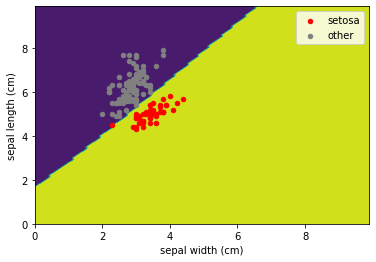

In [21]:
ax = plt.contourf(sepw, sepl, cdf["prediction"].values.reshape(sepw.shape))

setosa = df[df["variety"] == "setosa"]
other = df[df["variety"] != "setosa"]
setosa.plot.scatter(x='sepal width (cm)', y='sepal length (cm)',
                    ax=plt.gca(), color="red", label="setosa")
other.plot.scatter(x='sepal width (cm)', y='sepal length (cm)',
                   ax=plt.gca(), color="gray", label="other")